In [158]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from sklearn.metrics import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('../dataset/BankChurners.csv').iloc[:,1:-2]
df.shape

(10127, 20)

In [10]:
X = df.drop('Attrition_Flag', axis = 1)
Y = df['Attrition_Flag']

### encoding

In [115]:
encoding_columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
not_encoding_columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                       'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
                        'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [117]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [118]:
d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

(10127, 20)


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,3,1,2,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,2,2,4,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,1,2,1,3,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,0,3,3,4,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,1,5,1,2,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### train_test_split

In [119]:
X = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

In [121]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 19) (3039, 19)
(7088,) (3039,)


## 1. DecisionTree (resampling X)

In [122]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [123]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9293
테스트 데이터 세트 정확도: 0.9240


In [124]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=8)
dt_clf.fit(X_train,y_train)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [125]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.9239881539980257, roc_auc: 0.8736008938294465


Feature importances:
[0.    0.    0.    0.    0.    0.    0.001 0.    0.114 0.015 0.002 0.
 0.238 0.004 0.042 0.124 0.41  0.05  0.   ]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.000
Dependent_count : 0.001
Months_on_book : 0.000
Total_Relationship_Count : 0.114
Months_Inactive_12_mon : 0.015
Contacts_Count_12_mon : 0.002
Credit_Limit : 0.000
Total_Revolving_Bal : 0.238
Avg_Open_To_Buy : 0.004
Total_Amt_Chng_Q4_Q1 : 0.042
Total_Trans_Amt : 0.124
Total_Trans_Ct : 0.410
Total_Ct_Chng_Q4_Q1 : 0.050
Avg_Utilization_Ratio : 0.000
************************************
importance가 0보다 큰 columns:


[('Dependent_count', 0.0013935701018990118),
 ('Contacts_Count_12_mon', 0.0015030294181879976),
 ('Avg_Open_To_Buy', 0.0038749305409944133),
 ('Months_Inactive_12_mon', 0.014965355156610167),
 ('Total_Amt_Chng_Q4_Q1', 0.04222401072239038),
 ('Total_Ct_Chng_Q4_Q1', 0.04957931536440968),
 ('Total_Relationship_Count', 0.11419813037438029),
 ('Total_Trans_Amt', 0.12432025093698588),
 ('Total_Revolving_Bal', 0.23756201581798492),
 ('Total_Trans_Ct', 0.4103793915661572)]

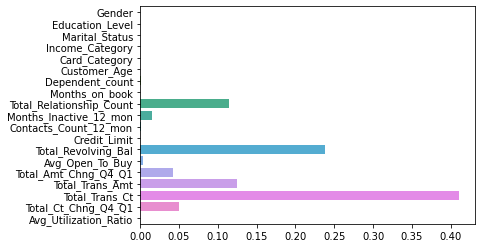

In [127]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_train.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_train.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## 2. undersampling

In [128]:
under_sampler = RandomUnderSampler(random_state = 123)
under_train_x, under_train_y = under_sampler.fit_resample(X_train, y_train)

In [129]:
under_train_x = pd.DataFrame(under_train_x, columns = X.columns)
under_train_y = pd.Series(under_train_y)

In [130]:
print(under_train_x.shape)
print(under_train_y.shape)
print('------------------')
print(under_train_y.value_counts())

(2320, 19)
(2320,)
------------------
1    1160
0    1160
Name: Attrition_Flag, dtype: int64


In [131]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(under_train_x,under_train_y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [133]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8815
테스트 데이터 세트 정확도: 0.8825


In [135]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=8)
dt_clf.fit(under_train_x,under_train_y)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [136]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.8835143139190523, roc_auc: 0.8856163060599904


Feature importances:
[0.    0.    0.    0.    0.    0.001 0.    0.002 0.078 0.    0.005 0.008
 0.123 0.    0.027 0.213 0.509 0.034 0.   ]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.001
Dependent_count : 0.000
Months_on_book : 0.002
Total_Relationship_Count : 0.078
Months_Inactive_12_mon : 0.000
Contacts_Count_12_mon : 0.005
Credit_Limit : 0.008
Total_Revolving_Bal : 0.123
Avg_Open_To_Buy : 0.000
Total_Amt_Chng_Q4_Q1 : 0.027
Total_Trans_Amt : 0.213
Total_Trans_Ct : 0.509
Total_Ct_Chng_Q4_Q1 : 0.034
Avg_Utilization_Ratio : 0.000
************************************
importance가 0보다 큰 columns:


[('Customer_Age', 0.001378321693613571),
 ('Months_on_book', 0.0015159807642098103),
 ('Contacts_Count_12_mon', 0.004898250393490578),
 ('Credit_Limit', 0.007956445831946032),
 ('Total_Amt_Chng_Q4_Q1', 0.02697315066276683),
 ('Total_Ct_Chng_Q4_Q1', 0.03392533633007614),
 ('Total_Relationship_Count', 0.07826416353094375),
 ('Total_Revolving_Bal', 0.12292305554040998),
 ('Total_Trans_Amt', 0.2134640728174032),
 ('Total_Trans_Ct', 0.5087012224351403)]

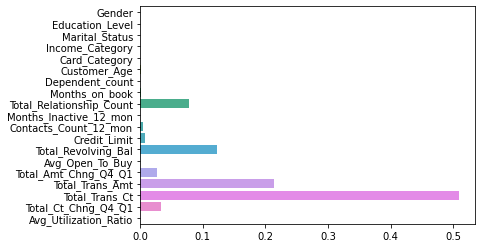

In [137]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(under_train_x.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = under_train_x.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## SMOTE

In [142]:
smote = SMOTE(random_state =123)
X_churn_sm, Y_churn_sm = smote.fit_resample(X_train, y_train)

In [143]:
print(X_churn_sm.shape)
print(Y_churn_sm.shape)

(11856, 19)
(11856,)


In [144]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_sm,Y_churn_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [145]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 4}
GridSearchCV 최고 정확도: 0.9238
테스트 데이터 세트 정확도: 0.9115


In [146]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=8)
dt_clf.fit(X_churn_sm,Y_churn_sm)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [147]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.9114840408028957, roc_auc: 0.8916252610055249


Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.081 0.    0.    0.008
 0.101 0.    0.024 0.204 0.56  0.022 0.   ]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.000
Dependent_count : 0.000
Months_on_book : 0.000
Total_Relationship_Count : 0.081
Months_Inactive_12_mon : 0.000
Contacts_Count_12_mon : 0.000
Credit_Limit : 0.008
Total_Revolving_Bal : 0.101
Avg_Open_To_Buy : 0.000
Total_Amt_Chng_Q4_Q1 : 0.024
Total_Trans_Amt : 0.204
Total_Trans_Ct : 0.560
Total_Ct_Chng_Q4_Q1 : 0.022
Avg_Utilization_Ratio : 0.000
************************************
importance가 0보다 큰 columns:


[('Months_Inactive_12_mon', 0.00029922834854806814),
 ('Contacts_Count_12_mon', 0.000415562940571716),
 ('Credit_Limit', 0.007522489289586743),
 ('Total_Ct_Chng_Q4_Q1', 0.021753712316780197),
 ('Total_Amt_Chng_Q4_Q1', 0.024178687844968957),
 ('Total_Relationship_Count', 0.08139091776728939),
 ('Total_Revolving_Bal', 0.10061726280571055),
 ('Total_Trans_Amt', 0.20372529891730817),
 ('Total_Trans_Ct', 0.5600968397692362)]

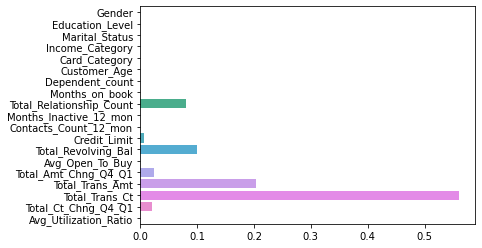

In [148]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_sm.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_sm.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## ADASYN

In [150]:
adasyn = ADASYN(random_state=123)
X_churn_ad, Y_churn_ad = adasyn.fit_resample(X_train, y_train)

In [151]:
print(X_churn_ad.shape)
print(Y_churn_ad.shape)

(12019, 19)
(12019,)


In [152]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_ad,Y_churn_ad)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [153]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.9014
테스트 데이터 세트 정확도: 0.8776


In [155]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=8)
dt_clf.fit(X_churn_ad,Y_churn_ad)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [156]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.8775913129318855, roc_auc: 0.8943847596085001


Feature importances:
[0.    0.    0.    0.    0.    0.    0.001 0.    0.075 0.    0.001 0.008
 0.039 0.002 0.012 0.178 0.588 0.095 0.   ]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.000
Dependent_count : 0.001
Months_on_book : 0.000
Total_Relationship_Count : 0.075
Months_Inactive_12_mon : 0.000
Contacts_Count_12_mon : 0.001
Credit_Limit : 0.008
Total_Revolving_Bal : 0.039
Avg_Open_To_Buy : 0.002
Total_Amt_Chng_Q4_Q1 : 0.012
Total_Trans_Amt : 0.178
Total_Trans_Ct : 0.588
Total_Ct_Chng_Q4_Q1 : 0.095
Avg_Utilization_Ratio : 0.000
************************************
importance가 0보다 큰 columns:


[('Dependent_count', 0.0007836635699020341),
 ('Contacts_Count_12_mon', 0.0010867036764423059),
 ('Avg_Open_To_Buy', 0.001956777369974651),
 ('Credit_Limit', 0.007599841492677409),
 ('Total_Amt_Chng_Q4_Q1', 0.012015114996052125),
 ('Total_Revolving_Bal', 0.03917538828780594),
 ('Total_Relationship_Count', 0.0754797040996318),
 ('Total_Ct_Chng_Q4_Q1', 0.09548257008940303),
 ('Total_Trans_Amt', 0.17809786316066123),
 ('Total_Trans_Ct', 0.5883223732574495)]

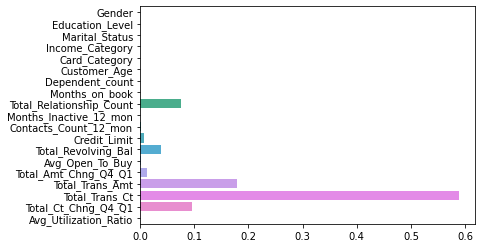

In [157]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_ad.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_ad.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## SMOTE-Tomek

In [159]:
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state = 123)
X_churn_smt, Y_churn_smt = smoteto.fit_resample(X_train, y_train)

In [160]:
print(X_churn_smt.shape)
print(Y_churn_smt.shape)

(11706, 19)
(11706,)


In [161]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_smt,Y_churn_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [162]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 4}
GridSearchCV 최고 정확도: 0.9279
테스트 데이터 세트 정확도: 0.9089


In [163]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=8)
dt_clf.fit(X_churn_smt,Y_churn_smt)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [164]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.9088515959197104, roc_auc: 0.8997089392935285


Feature importances:
[0.    0.    0.    0.    0.    0.002 0.    0.    0.073 0.002 0.002 0.008
 0.102 0.002 0.027 0.194 0.556 0.032 0.   ]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.002
Dependent_count : 0.000
Months_on_book : 0.000
Total_Relationship_Count : 0.073
Months_Inactive_12_mon : 0.002
Contacts_Count_12_mon : 0.002
Credit_Limit : 0.008
Total_Revolving_Bal : 0.102
Avg_Open_To_Buy : 0.002
Total_Amt_Chng_Q4_Q1 : 0.027
Total_Trans_Amt : 0.194
Total_Trans_Ct : 0.556
Total_Ct_Chng_Q4_Q1 : 0.032
Avg_Utilization_Ratio : 0.000
************************************
importance가 0보다 큰 columns:


[('Customer_Age', 0.0019464251146688327),
 ('Avg_Open_To_Buy', 0.001958670995299603),
 ('Months_Inactive_12_mon', 0.0023131838617692978),
 ('Contacts_Count_12_mon', 0.0024013298321137037),
 ('Credit_Limit', 0.00755028991163423),
 ('Total_Amt_Chng_Q4_Q1', 0.02734113020682267),
 ('Total_Ct_Chng_Q4_Q1', 0.03169519905407074),
 ('Total_Relationship_Count', 0.07327587861234527),
 ('Total_Revolving_Bal', 0.10200219875312419),
 ('Total_Trans_Amt', 0.1935589836131305),
 ('Total_Trans_Ct', 0.5559567100450209)]

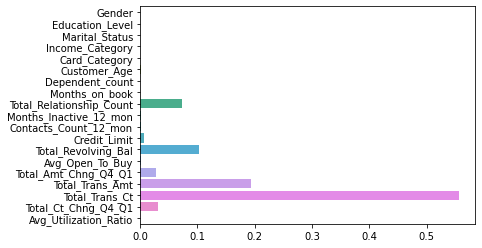

In [165]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_smt.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_smt.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

# total Trans Ct 변수 제거

In [166]:
encoding_columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
not_encoding_columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                       'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
                        'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [167]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [168]:
d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

(10127, 19)


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,3,1,2,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,1.625,0.061
1,1,0,2,2,4,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,3.714,0.105
2,1,1,2,1,3,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,2.333,0.000
3,1,0,3,3,4,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,2.333,0.760
4,1,1,5,1,2,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,2.500,0.000


### train_test_split

In [169]:
X = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

In [170]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 18) (3039, 18)
(7088,) (3039,)


In [171]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

### train_test_split

X = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10127, 19)
(7088, 18) (3039, 18)
(7088,) (3039,)


## 2. undersampling

In [172]:
under_sampler = RandomUnderSampler(random_state = 123)
under_train_x, under_train_y = under_sampler.fit_resample(X_train, y_train)

In [173]:
under_train_x = pd.DataFrame(under_train_x, columns = X.columns)
under_train_y = pd.Series(under_train_y)

In [174]:
print(under_train_x.shape)
print(under_train_y.shape)
print('------------------')
print(under_train_y.value_counts())

(2320, 18)
(2320,)
------------------
1    1160
0    1160
Name: Attrition_Flag, dtype: int64


In [175]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(under_train_x,under_train_y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [176]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 4}
GridSearchCV 최고 정확도: 0.8655
테스트 데이터 세트 정확도: 0.8838


In [177]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=8)
dt_clf.fit(under_train_x,under_train_y)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [178]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.8835143139190523, roc_auc: 0.8689673172794814


Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.08  0.007 0.003 0.
 0.387 0.011 0.013 0.32  0.178 0.   ]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.000
Dependent_count : 0.000
Months_on_book : 0.000
Total_Relationship_Count : 0.080
Months_Inactive_12_mon : 0.007
Contacts_Count_12_mon : 0.003
Credit_Limit : 0.000
Total_Revolving_Bal : 0.387
Avg_Open_To_Buy : 0.011
Total_Amt_Chng_Q4_Q1 : 0.013
Total_Trans_Amt : 0.320
Total_Ct_Chng_Q4_Q1 : 0.178
Avg_Utilization_Ratio : 0.000
************************************
importance가 0보다 큰 columns:


[('Contacts_Count_12_mon', 0.003278570320298806),
 ('Months_Inactive_12_mon', 0.007332815163032641),
 ('Avg_Open_To_Buy', 0.011027937529590024),
 ('Total_Amt_Chng_Q4_Q1', 0.013255711642319307),
 ('Total_Relationship_Count', 0.08011550550773601),
 ('Total_Ct_Chng_Q4_Q1', 0.17771439187851668),
 ('Total_Trans_Amt', 0.3202797516178207),
 ('Total_Revolving_Bal', 0.38699531634068585)]

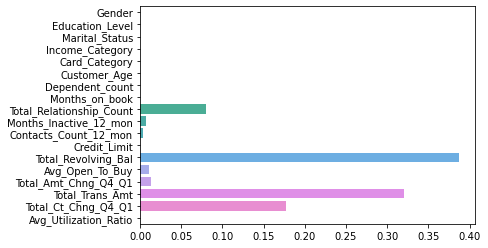

In [179]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(under_train_x.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = under_train_x.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## SMOTE

In [180]:
smote = SMOTE(random_state =123)
X_churn_sm, Y_churn_sm = smote.fit_resample(X_train, y_train)

In [181]:
print(X_churn_sm.shape)
print(Y_churn_sm.shape)

(11856, 18)
(11856,)


In [182]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_sm,Y_churn_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [183]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 4}
GridSearchCV 최고 정확도: 0.9033
테스트 데이터 세트 정확도: 0.8759


In [184]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=8)
dt_clf.fit(X_churn_sm,Y_churn_sm)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [185]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.8756169792694966, roc_auc: 0.8809506761999594


Feature importances:
[0.    0.    0.    0.    0.    0.045 0.    0.    0.091 0.    0.    0.006
 0.165 0.003 0.038 0.612 0.039 0.001]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.045
Dependent_count : 0.000
Months_on_book : 0.000
Total_Relationship_Count : 0.091
Months_Inactive_12_mon : 0.000
Contacts_Count_12_mon : 0.000
Credit_Limit : 0.006
Total_Revolving_Bal : 0.165
Avg_Open_To_Buy : 0.003
Total_Amt_Chng_Q4_Q1 : 0.038
Total_Trans_Amt : 0.612
Total_Ct_Chng_Q4_Q1 : 0.039
Avg_Utilization_Ratio : 0.001
************************************
importance가 0보다 큰 columns:


[('Contacts_Count_12_mon', 0.0004672927484062133),
 ('Avg_Utilization_Ratio', 0.0008886939914714188),
 ('Avg_Open_To_Buy', 0.002878620073779812),
 ('Credit_Limit', 0.006290329484236133),
 ('Total_Amt_Chng_Q4_Q1', 0.03838408093727326),
 ('Total_Ct_Chng_Q4_Q1', 0.038868119237763635),
 ('Customer_Age', 0.04526355295869464),
 ('Total_Relationship_Count', 0.09072566933108245),
 ('Total_Revolving_Bal', 0.16461289724697117),
 ('Total_Trans_Amt', 0.6116207439903213)]

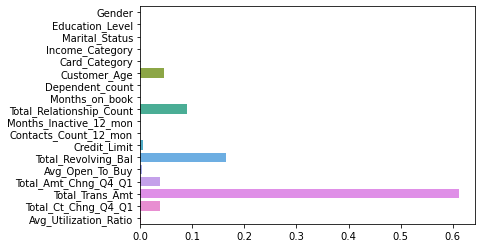

In [186]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_sm.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_sm.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## ADASYN

In [187]:
adasyn = ADASYN(random_state=123)
X_churn_ad, Y_churn_ad = adasyn.fit_resample(X_train, y_train)

In [188]:
print(X_churn_ad.shape)
print(Y_churn_ad.shape)

(11871, 18)
(11871,)


In [189]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_ad,Y_churn_ad)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [190]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8745
테스트 데이터 세트 정확도: 0.8526


In [191]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=8)
dt_clf.fit(X_churn_ad,Y_churn_ad)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [192]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.8522540309312274, roc_auc: 0.8645194001618484


Feature importances:
[0.    0.    0.    0.    0.    0.035 0.    0.    0.107 0.    0.    0.001
 0.042 0.009 0.07  0.588 0.149 0.   ]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.035
Dependent_count : 0.000
Months_on_book : 0.000
Total_Relationship_Count : 0.107
Months_Inactive_12_mon : 0.000
Contacts_Count_12_mon : 0.000
Credit_Limit : 0.001
Total_Revolving_Bal : 0.042
Avg_Open_To_Buy : 0.009
Total_Amt_Chng_Q4_Q1 : 0.070
Total_Trans_Amt : 0.588
Total_Ct_Chng_Q4_Q1 : 0.149
Avg_Utilization_Ratio : 0.000
************************************
importance가 0보다 큰 columns:


[('Contacts_Count_12_mon', 0.00011859555662424635),
 ('Credit_Limit', 0.0008938616914481437),
 ('Avg_Open_To_Buy', 0.009323563583011165),
 ('Customer_Age', 0.034667209624001355),
 ('Total_Revolving_Bal', 0.04169677631924345),
 ('Total_Amt_Chng_Q4_Q1', 0.06969310652344518),
 ('Total_Relationship_Count', 0.10652446640960661),
 ('Total_Ct_Chng_Q4_Q1', 0.14945482712844324),
 ('Total_Trans_Amt', 0.5876275931641766)]

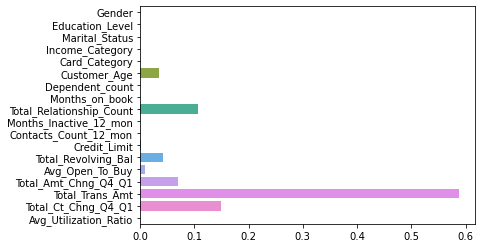

In [193]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_ad.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_ad.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## SMOTE-Tomek

In [194]:
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state = 123)
X_churn_smt, Y_churn_smt = smoteto.fit_resample(X_train, y_train)

In [195]:
print(X_churn_smt.shape)
print(Y_churn_smt.shape)

(11699, 18)
(11699,)


In [196]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_smt,Y_churn_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [197]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.9049
테스트 데이터 세트 정확도: 0.8838


In [198]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=8)
dt_clf.fit(X_churn_smt,Y_churn_smt)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [199]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.8841724251398486, roc_auc: 0.8807475331439552


Feature importances:
[0.    0.    0.    0.    0.    0.045 0.    0.    0.091 0.    0.    0.006
 0.166 0.003 0.036 0.615 0.037 0.001]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.045
Dependent_count : 0.000
Months_on_book : 0.000
Total_Relationship_Count : 0.091
Months_Inactive_12_mon : 0.000
Contacts_Count_12_mon : 0.000
Credit_Limit : 0.006
Total_Revolving_Bal : 0.166
Avg_Open_To_Buy : 0.003
Total_Amt_Chng_Q4_Q1 : 0.036
Total_Trans_Amt : 0.615
Total_Ct_Chng_Q4_Q1 : 0.037
Avg_Utilization_Ratio : 0.001
************************************
importance가 0보다 큰 columns:


[('Contacts_Count_12_mon', 0.00046677964420298356),
 ('Avg_Utilization_Ratio', 0.0008896031160124315),
 ('Avg_Open_To_Buy', 0.002771334467897175),
 ('Credit_Limit', 0.006317375787753991),
 ('Total_Amt_Chng_Q4_Q1', 0.036029827412803445),
 ('Total_Ct_Chng_Q4_Q1', 0.0365131930455187),
 ('Customer_Age', 0.0449450411629655),
 ('Total_Relationship_Count', 0.09110328007867073),
 ('Total_Revolving_Bal', 0.16637733578662048),
 ('Total_Trans_Amt', 0.6145862294975545)]

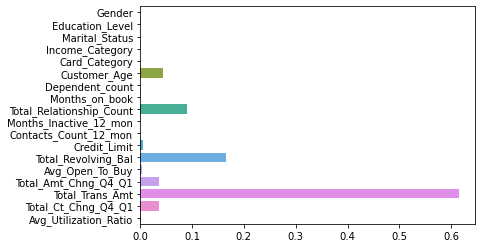

In [200]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_smt.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_smt.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

# 신용관련 데이터 제거 
* ['Attrition_Flag','Customer_Age','Gender','Dependent_count','Education_Level', 'Marital_Status','Income_Category','Card_Category','Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon']

### encoding

In [202]:
encoding_columns = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
not_encoding_columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                       'Months_Inactive_12_mon','Contacts_Count_12_mon']

In [203]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [204]:
d1 = df[encoding_columns].apply(encoding_label)
d2 = df[not_encoding_columns]
data = d1.join(d2)
print(data.shape)
data.head()

(10127, 12)


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,1,1,3,1,2,0,45,3,39,5,1,3
1,1,0,2,2,4,0,49,5,44,6,1,2
2,1,1,2,1,3,0,51,3,36,4,1,0
3,1,0,3,3,4,0,40,4,34,3,4,1
4,1,1,5,1,2,0,40,3,21,5,1,0


### train_test_split

In [205]:
X = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

In [206]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7088, 11) (3039, 11)
(7088,) (3039,)


## 1. DecisionTree (resampling X)

In [207]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [208]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 4}
GridSearchCV 최고 정확도: 0.8500
테스트 데이터 세트 정확도: 0.8631


In [209]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=8)
dt_clf.fit(X_train,y_train)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [210]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.8631128660743665, roc_auc: 0.5598614297940929


Feature importances:
[0.    0.    0.    0.    0.    0.009 0.    0.034 0.211 0.166 0.58 ]
Gender : 0.000
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.009
Dependent_count : 0.000
Months_on_book : 0.034
Total_Relationship_Count : 0.211
Months_Inactive_12_mon : 0.166
Contacts_Count_12_mon : 0.580
************************************
importance가 0보다 큰 columns:


[('Customer_Age', 0.008924970741811764),
 ('Months_on_book', 0.034421623221550644),
 ('Months_Inactive_12_mon', 0.16577625665893858),
 ('Total_Relationship_Count', 0.21127812279129368),
 ('Contacts_Count_12_mon', 0.5795990265864053)]

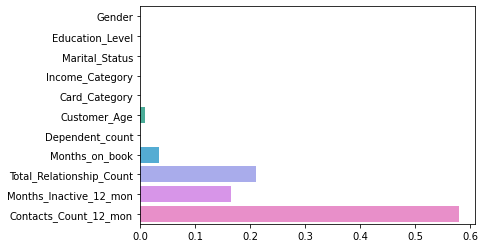

In [211]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_train.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_train.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## 2. undersampling

In [212]:
under_sampler = RandomUnderSampler(random_state = 123)
under_train_x, under_train_y = under_sampler.fit_resample(X_train, y_train)

In [213]:
under_train_x = pd.DataFrame(under_train_x, columns = X.columns)
under_train_y = pd.Series(under_train_y)

In [214]:
print(under_train_x.shape)
print(under_train_y.shape)
print('------------------')
print(under_train_y.value_counts())

(2320, 11)
(2320,)
------------------
1    1160
0    1160
Name: Attrition_Flag, dtype: int64


In [215]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(under_train_x,under_train_y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [216]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.6608
테스트 데이터 세트 정확도: 0.6213


In [217]:
dt_clf=DecisionTreeClassifier(max_depth=4, min_samples_split=2, random_state=8)
dt_clf.fit(under_train_x,under_train_y)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [218]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.6215860480421191, roc_auc: 0.6765446365237894


Feature importances:
[0.    0.009 0.    0.    0.    0.018 0.    0.097 0.229 0.329 0.319]
Gender : 0.000
Education_Level : 0.009
Marital_Status : 0.000
Income_Category : 0.000
Card_Category : 0.000
Customer_Age : 0.018
Dependent_count : 0.000
Months_on_book : 0.097
Total_Relationship_Count : 0.229
Months_Inactive_12_mon : 0.329
Contacts_Count_12_mon : 0.319
************************************
importance가 0보다 큰 columns:


[('Education_Level', 0.008881287048812931),
 ('Customer_Age', 0.018210441058502638),
 ('Months_on_book', 0.09650041753795445),
 ('Total_Relationship_Count', 0.22853950754032967),
 ('Contacts_Count_12_mon', 0.3191072313349953),
 ('Months_Inactive_12_mon', 0.328761115479405)]

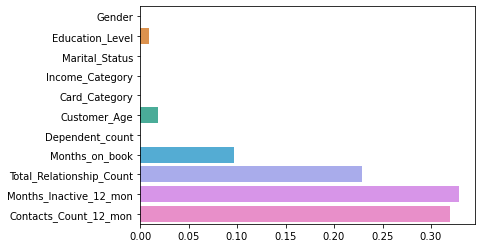

In [219]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(under_train_x.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = under_train_x.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## SMOTE

In [220]:
smote = SMOTE(random_state =123)
X_churn_sm, Y_churn_sm = smote.fit_resample(X_train, y_train)

In [221]:
print(X_churn_sm.shape)
print(Y_churn_sm.shape)

(11856, 11)
(11856,)


In [222]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_sm,Y_churn_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [223]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 4}
GridSearchCV 최고 정확도: 0.7114
테스트 데이터 세트 정확도: 0.7160


In [224]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=8)
dt_clf.fit(X_churn_sm,Y_churn_sm)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [225]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.7160250082263903, roc_auc: 0.6254337603777794


Feature importances:
[0.126 0.003 0.007 0.135 0.    0.004 0.024 0.064 0.323 0.2   0.112]
Gender : 0.126
Education_Level : 0.003
Marital_Status : 0.007
Income_Category : 0.135
Card_Category : 0.000
Customer_Age : 0.004
Dependent_count : 0.024
Months_on_book : 0.064
Total_Relationship_Count : 0.323
Months_Inactive_12_mon : 0.200
Contacts_Count_12_mon : 0.112
************************************
importance가 0보다 큰 columns:


[('Education_Level', 0.0031586848844542496),
 ('Customer_Age', 0.004416336219400384),
 ('Marital_Status', 0.006501120155309084),
 ('Dependent_count', 0.024446646361695166),
 ('Months_on_book', 0.06436888291352885),
 ('Contacts_Count_12_mon', 0.11230573472048865),
 ('Gender', 0.1262859254931994),
 ('Income_Category', 0.13521640078979916),
 ('Months_Inactive_12_mon', 0.2002516746898244),
 ('Total_Relationship_Count', 0.32304859377230066)]

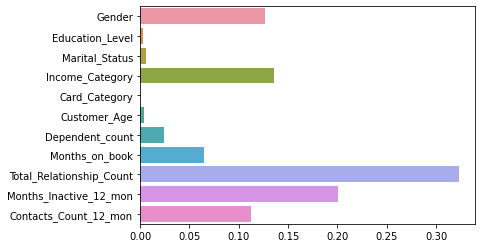

In [226]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_sm.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_sm.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## ADASYN

In [227]:
adasyn = ADASYN(random_state=123)
X_churn_ad, Y_churn_ad = adasyn.fit_resample(X_train, y_train)

In [228]:
print(X_churn_ad.shape)
print(Y_churn_ad.shape)

(11512, 11)
(11512,)


In [229]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_ad,Y_churn_ad)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [230]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.6941
테스트 데이터 세트 정확도: 0.6584


In [231]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=8)
dt_clf.fit(X_churn_ad,Y_churn_ad)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [232]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.6584402764067128, roc_auc: 0.6185776822376374


Feature importances:
[0.138 0.    0.    0.275 0.    0.019 0.021 0.072 0.242 0.132 0.101]
Gender : 0.138
Education_Level : 0.000
Marital_Status : 0.000
Income_Category : 0.275
Card_Category : 0.000
Customer_Age : 0.019
Dependent_count : 0.021
Months_on_book : 0.072
Total_Relationship_Count : 0.242
Months_Inactive_12_mon : 0.132
Contacts_Count_12_mon : 0.101
************************************
importance가 0보다 큰 columns:


[('Customer_Age', 0.01861988427219073),
 ('Dependent_count', 0.020501891974067262),
 ('Months_on_book', 0.07162506886584087),
 ('Contacts_Count_12_mon', 0.10141445441921561),
 ('Months_Inactive_12_mon', 0.13245268219401857),
 ('Gender', 0.1382316009173477),
 ('Total_Relationship_Count', 0.24184550195535182),
 ('Income_Category', 0.2753089154019675)]

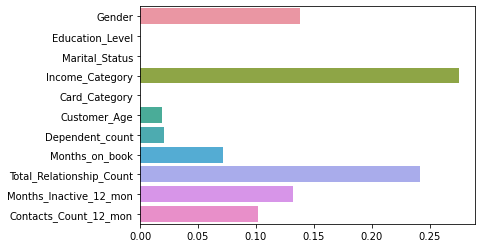

In [233]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_ad.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_ad.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst

## SMOTE-Tomek

In [234]:
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state = 123)
X_churn_smt, Y_churn_smt = smoteto.fit_resample(X_train, y_train)

In [235]:
print(X_churn_smt.shape)
print(Y_churn_smt.shape)

(11748, 11)
(11748,)


In [236]:
dt_clf=DecisionTreeClassifier()
param={ "max_depth":[2, 3, 4, 5, 6], 
       "min_samples_split":[2, 3, 4, 5] }

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_churn_smt,Y_churn_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [237]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 4}
GridSearchCV 최고 정확도: 0.7118
테스트 데이터 세트 정확도: 0.7160


In [238]:
dt_clf=DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=8)
dt_clf.fit(X_churn_smt,Y_churn_smt)
pred_y = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_y)
acu_roc = roc_auc_score(y_test, pred_y)

In [239]:
print(f'accuracy: {acc_test}, roc_auc: {acu_roc}')

accuracy: 0.7160250082263903, roc_auc: 0.6254337603777794


Feature importances:
[0.125 0.003 0.    0.138 0.    0.005 0.024 0.064 0.331 0.197 0.113]
Gender : 0.125
Education_Level : 0.003
Marital_Status : 0.000
Income_Category : 0.138
Card_Category : 0.000
Customer_Age : 0.005
Dependent_count : 0.024
Months_on_book : 0.064
Total_Relationship_Count : 0.331
Months_Inactive_12_mon : 0.197
Contacts_Count_12_mon : 0.113
************************************
importance가 0보다 큰 columns:


[('Education_Level', 0.0031467990556378897),
 ('Customer_Age', 0.004542940421878298),
 ('Dependent_count', 0.0243040855791044),
 ('Months_on_book', 0.06417117122713614),
 ('Contacts_Count_12_mon', 0.11319906160434938),
 ('Gender', 0.12469865464665722),
 ('Income_Category', 0.137847869470269),
 ('Months_Inactive_12_mon', 0.1973578433939434),
 ('Total_Relationship_Count', 0.3307315746010242)]

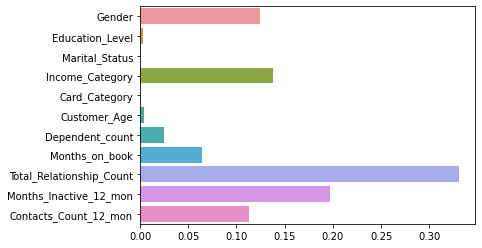

In [240]:
import seaborn as sns
import numpy as np
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

top_lst = {}
lst = []

for name, value in zip(X_churn_smt.columns, dt_clf.feature_importances_):
    top_lst[name] = value
    print('{0} : {1:.3f}'.format(name, value))
sns.barplot(x = dt_clf.feature_importances_, y = X_churn_smt.columns)

sorted_dict = sorted(top_lst.items(), key = lambda item :item[1])
for i in sorted_dict:
    if i[1] > 0:
        lst.append(i)
print('************************************')
print('importance가 0보다 큰 columns:')
lst